In [1]:
from IPython.display import Image
import sys
import pandas
import numpy
import matplotlib.pyplot as plt
import numpy as np
import json
import pprint
import json
import uuid
from IPython.display import display_javascript, display_html, display
import json
style_css = """<style>
.renderjson a              { text-decoration: none; }
.renderjson .disclosure    { color: grey; font-size: 120%; }
.renderjson .syntax        { color: grey; }
.renderjson .string        { color: black; }
.renderjson .number        { color: green; }
.renderjson .boolean       { color: red; }
.renderjson .key           { color: black; }
.renderjson .keyword       { color: grey; }
.renderjson .object.syntax { color: lightseagreen; }
.renderjson .array.syntax  { color: lightsalmon; }
</style>"""
class RenderJSON(object):
    def __init__(self, json_data):
        if isinstance(json_data, dict):
            self.json_str = json.dumps(json_data)
        else:
            self.json_str = json_data
        self.uuid = str(uuid.uuid4())

    def _ipython_display_(self):
        display_html(style_css + '<div id="{}" style="height: 600px; width:100%;"></div>'.format(self.uuid), raw=True)
        display_javascript("""
        require(["https://rawgit.com/caldwell/renderjson/master/renderjson.js"], function() {
        document.getElementById('%s').appendChild(renderjson(%s))
        });
        """ % (self.uuid, self.json_str), raw=True)

from matplotlib import rcParams
rcParams['font.family'] = 'serif'


!['Cambridge vs. Oxford repository showdown!'](resources/reposhowdown.png)
### By Matteo Cancellieri
#### CORE, KMI, The Open University, United Kingdom
#### Any questions? Ask me in person or tweet it to @oacore and don't forget the hashtag #devacuk
#### You can find this notebook and all the code and material here https://github.com/oacore/

# Analysing the eternal British universities rivalry through CORE and the ORCID API

## What is CORE
### We aggregate the world’s open access research papers.
### We offer seamless access to millions of open access research papers, enrich the collected data for text-mining and provide unique services to the research community.
### At the moment we are offering:
### Metadata: 124,648,210
### Full text: 9,975,334

### The good thing is that you can access all of this material at any moment with:

### CORE API
![the CORE API](resources/api.png?classes="float-left"  "The CORE API") 
to develop applications making use of our large collection of Open Access content. 
### CORE Dataset
![the CORE Dataset](resources/dataset.png "The CORE Dataset") 
 enables you to download all the aggregated content from Open Access journals and repositories. Use the dataset for analysis and application of computationally intensive processes.
### CORE Publisher connector
!["The CORE Publisher connector"](resources/pubconnector.png "The CORE Publisher connector") 
is a software providing seamless access to Gold and Hybrid Gold Open Access articles aggregated from non-standard systems of major publishers. Data is exposed using the ResourceSync protocol.
### [NEW] CORE Fast sync interface
![the CORE Fast Sync](resources/corefastsync.png "The CORE Fast Sync") 
provides access to the full CORE collection through a fast and reliable way (based on ResourceSync).

## Downloading research outputs using the CORE API

![Api meme](resources/UseTheAPILuke.jpg)

### Where to start:

Register at https://core.ac.uk/api-keys/register to receive an API key and start testing!

At https://core.ac.uk/docs there is a Swagger console to test live the API calls

We have also integrated various SDK to kick start your work with the CORE API.
At the moment we have:
A Java Client https://github.com/oacore/oacore4j
An R Client developed in collaboration with ROpenScience https://github.com/ropensci/rcoreoa
A Python Client https://github.com/oacore/pyoacore 

We also have few examples to play with on our github repository https://github.com/oacore



## Import the needed libraries

## Call the CORE API to retrieve all articles for a given repository

In [2]:
%set_env CORE_API_KEY 1cYpQHHJBM61XstNV9NxrD2CvGOe10oK

env: CORE_API_KEY=1cYpQHHJBM61XstNV9NxrD2CvGOe10oK


#### This is how the CORE data looks like

In [3]:
from pyoacore.apis.articles_api import ArticlesApi
api = ArticlesApi()
result = api.articles_get_core_id_get(77398041)
RenderJSON(result)

{'core_id': 77398041}
APIKeyQueryParam
{}
https://core.ac.uk/api-v2/articles/get/77398041?apiKey=1cYpQHHJBM61XstNV9NxrD2CvGOe10oK


### You can download all the articles from a single repository through this API call:
`
/api-v2/articles/search/repositories.id:REPO_ID?apiKey=APIKEY&page=PAGE&pageSize=SIZE
`



### To make things easier, you can use this utility command in the pyoacore api and dump all the core articles main metadata in a CSV

```
python dumpRepositories.py --api_key API_KEY --repo_id REPO_ID
```


#### These are the records we get from the CSV for each repository

In [4]:
cambridge = pandas.read_csv('exports/articles-27.tsv',sep='\t', names=('ID', "Title", "Published date", "DOI"))
oxford = pandas.read_csv('exports/articles-88.tsv',sep='\t', names=('ID', "Title", "Published date", "DOI"))

print ("Oxford total records: %d Cambridge total records: %d" % (oxford.Title.count(), cambridge.Title.count()))

Oxford total records: 205187 Cambridge total records: 207569


#### ... and these are the fields we have projected. 

In [5]:
oxford

,ID,Title,Published date,DOI
0,42675,Discrete quantum walks and quantum image proce...,2005,NaN
1,42686,Neutron and x-ray scattering studies of strong...,2008,NaN
2,111757,Integrating pests and pathogens into the clima...,2009,10.1093/jxb
3,111759,Understanding participation in sport and physi...,2006,10.1093/her
4,225395,Field trials of suction caissons in clay for o...,2005-May,NaN
5,225396,Modelling the behaviour of circular footings u...,2002-December,NaN
6,225398,A generalised Winkler model for the behaviour ...,2005-August,NaN
7,225401,Elastic moduli of soils dependent on pressure:...,2005-June,NaN
8,225403,Undrained bearing capacity factors for conical...,2003-June,NaN
9,225844,Topical NSAIDs for acute pain: a meta-analysis,2004-May,10.1186/1471-2296-5-10


In [136]:
from dateutil.parser import parse
from datetime import *

def date_conv(x):
    try:
        return parse(str(x), fuzzy=True, default=datetime(1970, 1, 1)).year
    except:
        return str(x)[:4]

cambridge["year"] = cambridge["Published date"].apply(lambda x: date_conv(x) )
oxford["year"] = oxford["Published date"].apply(lambda x: date_conv(x) )


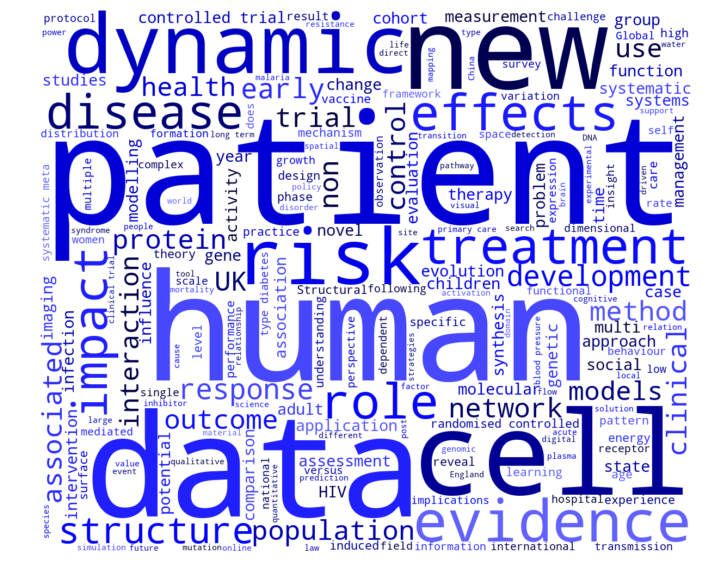

In [147]:
from wordcloud import WordCloud, STOPWORDS
import random
stopwords = ["review","based","model","effect","analysis","research","study","using","a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the"]

oxford["year_float"] = pandas.to_numeric(oxford['year'], errors='coerce')
oxford1617 = oxford[oxford.year_float > 2016]
oxfordtitles = oxford1617.Title.str.cat(sep=" ")
wordcloud = WordCloud(
                          stopwords=stopwords,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(oxfordtitles)

# store default colored image
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(240, 100%%, %d%%)" % random.randint(10, 70)
default_colors = wordcloud.to_array()

fig, ax = plt.subplots(figsize=(15, 10))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')

plt.show()

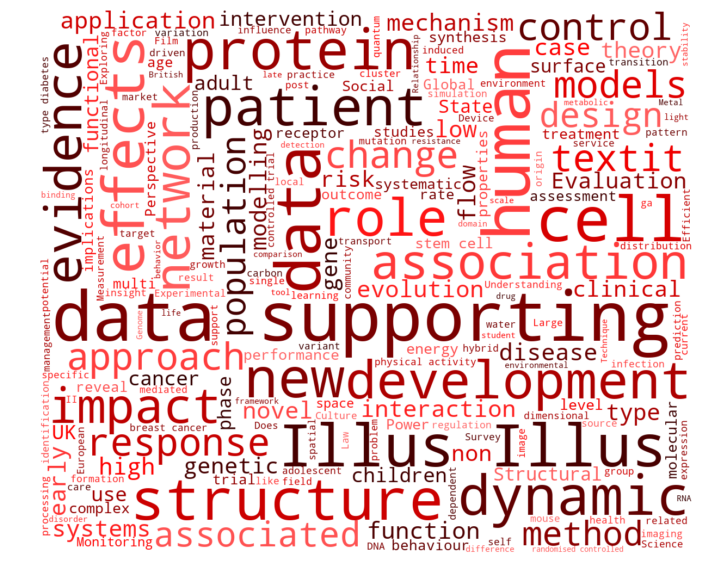

In [146]:
from wordcloud import WordCloud, STOPWORDS
import random
stopwords = ["review","based","model","effect","analysis","research","study","using","a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the"]

cambridge["year_float"] = pandas.to_numeric(cambridge['year'], errors='coerce')
cambridge1617 = cambridge[cambridge.year_float > 2016]
cambridgetitles = cambridge1617.Title.str.cat(sep=" ")
wordcloud = WordCloud(
                          stopwords=stopwords,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(cambridgetitles)

# store default colored image
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 100%%, %d%%)" % random.randint(10, 70)
default_colors = wordcloud.to_array()

fig, ax = plt.subplots(figsize=(15, 10))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')

plt.show()

## Get the average publications per year from 2007 to 2017

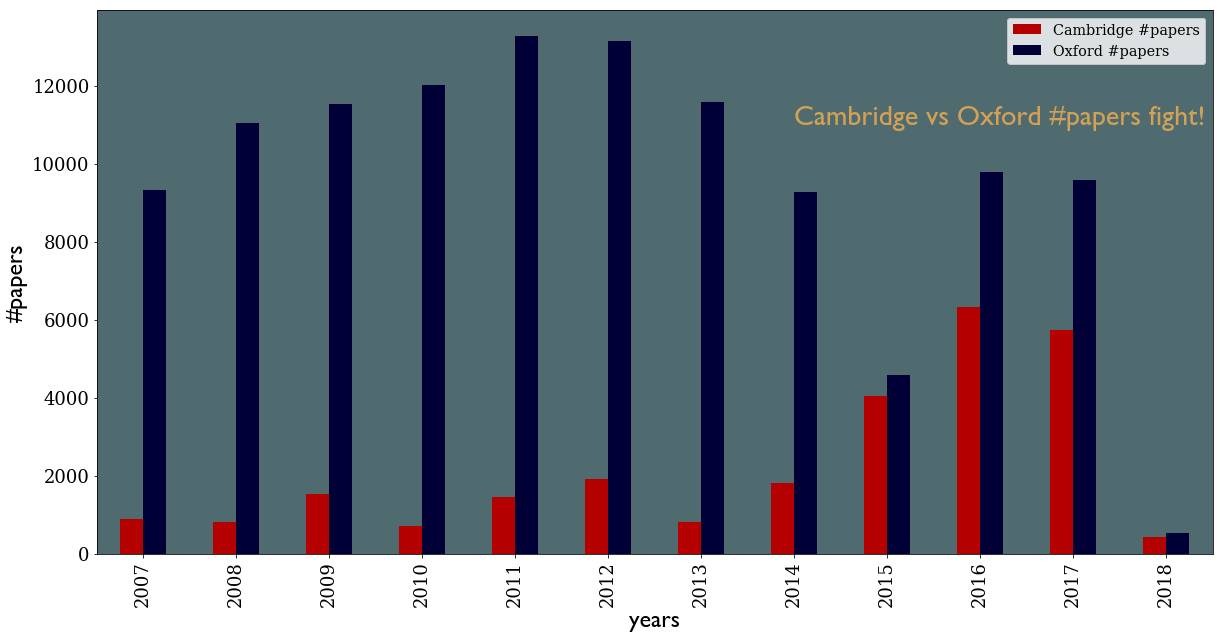

In [7]:
cam_year = cambridge.groupby("year")['year'].agg(['count'])
ox_year = oxford.groupby("year")['year'].agg(['count'])
oxbridge_years = cam_year.merge(ox_year, right_index=True, left_index=True)
oxbridge_years.columns=["Cambridge #papers", "Oxford #papers"]

oxbridge_years=oxbridge_years[oxbridge_years.index>2006]
import matplotlib.font_manager as fm

ax = oxbridge_years.plot(kind="bar", xlim=(2010,2017), figsize=(20,10), color=['#B50000', '#000036'])
prop = fm.FontProperties(fname='/Library/Fonts/GillSans.ttc')
ax.text(7,11000,"Cambridge vs Oxford #papers fight!", color='#D3A153', fontproperties=prop, size=28)

ax.set_facecolor('#4F6B70')
ax.set_ylabel("#papers",  fontproperties=prop, fontsize=24)
ax.set_xlabel("years", fontproperties=prop, fontsize=24)
ax.legend( fontsize="x-large")
ax.tick_params(labelsize=18)


 


### ORCID ID coverage

We have developed a script whereby you can dicover ORCID authors based on the paper DOI

We are using the following API
```
"https://pub.orcid.org/v2.1/search/?q=doi-self:%22" + doi + "%22"
```
An interesting trick to use in this API is to have a rate limiter to avoid hitting the ORCID API too hard.


#### This code will implement a simple client that will call the ORCID API without violating the API Limit.

You can find our script in https://github.com/oacore/orcid-experiments

```python

if (len(self.queue) < 12):
    self.queue.append([self.getSearchUrl(doi), doi, coreId])
else:
    self.queue.append(self.getSearchUrl(doi))
    requestset = (grequests.get(item[0], headers=self.headers) for item in self.queue)
    startTime = time.time()
    responses = grequests.map(requestset)
    i = 0
    for response in responses:
        #...
        
```


### We then load the data and have a look. Which university will have more authors with an ORCID ID?

In [51]:
cambridge_orcids = pandas.read_csv('exports/27-orcid-full.tsv',sep='\t', names=('CORE_ID', 'DOI', "ORCID"))
oxford_orcids = pandas.read_csv('exports/88-orcid-full.tsv',sep='\t', names=('CORE_ID', 'DOI', "ORCID"))
print("%d Total ORCID in Cambridge - %d Total ORCID in Oxford" % (cambridge_orcids.ORCID.count(), oxford_orcids.ORCID.count()))

12660 Total ORCID in Cambridge - 270782 Total ORCID in Oxford


In [13]:
oxford_orcids_noj = oxford_orcids[~oxford_orcids.DOI.str.match("10.(\d+)/([a-z|A-Z]+)$")]
cambridge_orcids_noj = cambridge_orcids[~cambridge_orcids.DOI.str.match("10.(\d+)/([a-z|A-Z]+)$")]


print("%d Total ORCID in Cambridge - %d Total ORCID in Oxford" % (cambridge_orcids_noj.ORCID.count(), oxford_orcids_noj.ORCID.count()))

9549 Total ORCID in Cambridge - 208328 Total ORCID in Oxford


In [ ]:
collaboration = cambridge_orcids_noj.merge(oxford_orcids_noj, on="ORCID", how="inner")
len(collaboration.ORCID.unique())

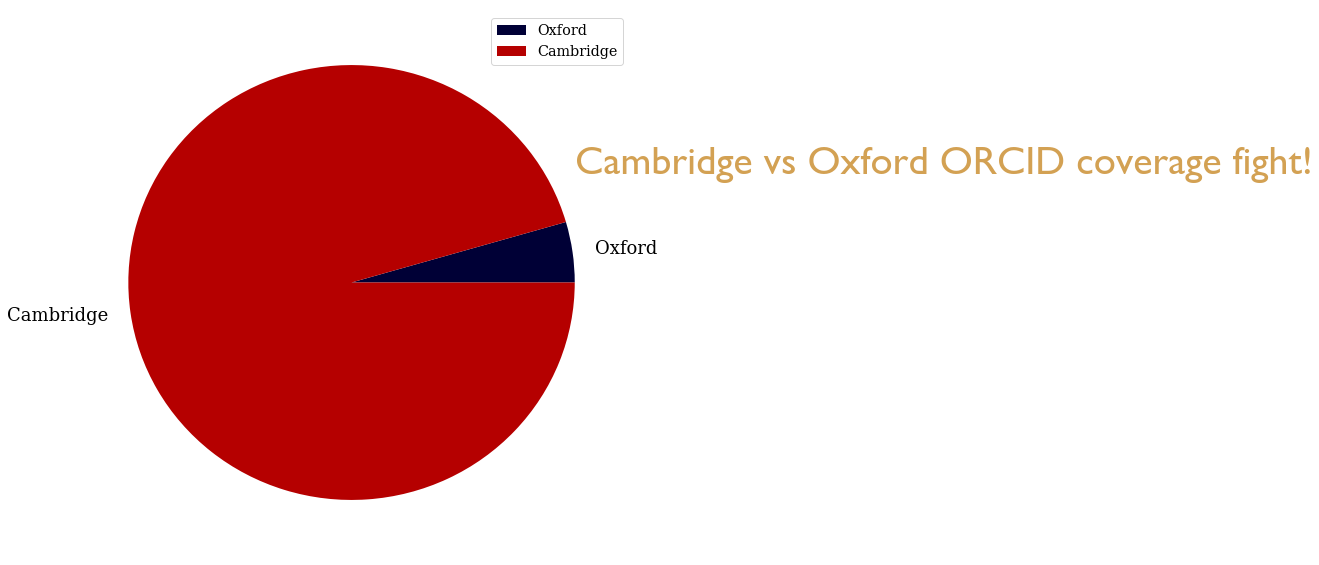

In [64]:

oxbridge_orcid_coverage = pandas.DataFrame([
    { oxford.DOI.isin(oxford_orcids_noj).count()/oxford.DOI.count()},
    { cambridge.DOI.isin(cambridge_orcids_noj).count()/cambridge.DOI.count()}
])
oxbridge_orcid_coverage.columns=[ ""]
oxbridge_orcid_coverage = oxbridge_orcid_coverage.rename(index={0:'Oxford', 1: 'Cambridge'})
explode = (0, 0.1, 0, 0)
ax = oxbridge_orcid_coverage.plot.pie("", figsize=(10,10), colors=['#000036','#B50000'], fontsize=18)
prop = fm.FontProperties(fname='/Library/Fonts/GillSans.ttc')

ax.text(1,0.5,"Cambridge vs Oxford ORCID coverage fight!", color='#D3A153', fontproperties=prop, size=40)
ax.set_facecolor('#4F6B70')
ax.legend( fontsize="x-large")
ax.tick_params(labelsize=18)


### How about citations?


In [8]:
oxford_citations = pandas.read_csv('exports/citation-data-88.csv')
oxford_core_citations = oxford.merge(oxford_citations, on="DOI").drop_duplicates("ID")
oxford_core_citations



,ID,Title,Published date,DOI,year,CORE_ID,CITATIONS,MS_ID
0,225844,Topical NSAIDs for acute pain: a meta-analysis,2004-May,10.1186/1471-2296-5-10,2004,225844,90,2100031177
1,225870,Seroprotection against serogroup C meningococc...,2008-June,10.1136/bmj.39563.545255.AE,2008,225870,89,2052139850
2,225923,Ethics committees and the legality of research,2007-December,10.1136/jme.2007.020479,2007,225923,2,2007790569
6,77458063,Ethics committees and the legality of research.,2007-12,10.1136/jme.2007.020479,2007,225923,2,2007790569
10,225941,Assessing the quality of research,NaN,10.1136/bmj.328.7430.39,nan,226535,275,1976541880
14,77448293,Assessing the quality of research.,2004-1,10.1136/bmj.328.7430.39,2004,226535,275,1976541880
18,225942,Evaluating new screening tests for breast cancer,2006-March,10.1136/bmj.332.7543.678,2006,225942,31,2066568878
22,77443486,Evaluating new screening tests for breast cancer.,2006-3,10.1136/bmj.332.7543.678,2006,225942,31,2066568878
26,225944,Teaching evidence based medicine,2004-October,10.1136/bmj.329.7473.989,2004,226536,68,80788041
30,77381534,Teaching evidence based medicine.,2004-10,10.1136/bmj.329.7473.989,2004,226536,68,80788041


In [9]:
cambridge_citations = pandas.read_csv('exports/citation-data-27.csv')
cambridge_core_citations = cambridge.merge(cambridge_citations, left_on="DOI", right_on="DOI").drop_duplicates("ID")


In [10]:
cam_cit_year = cambridge_core_citations.groupby('year')['CITATIONS'].agg(["mean"])
ox_cit_year = oxford_core_citations.groupby('year')['CITATIONS'].agg(["mean"])
oxbridge_core_citations = ox_cit_year.merge(cam_cit_year, right_index=True, left_index=True, how='inner' )
oxbridge_core_citations.columns = ["Oxford mean citations", "Cambridge mean citations"]

oxbridge_core_citations = oxbridge_core_citations[oxbridge_core_citations.index>2007]


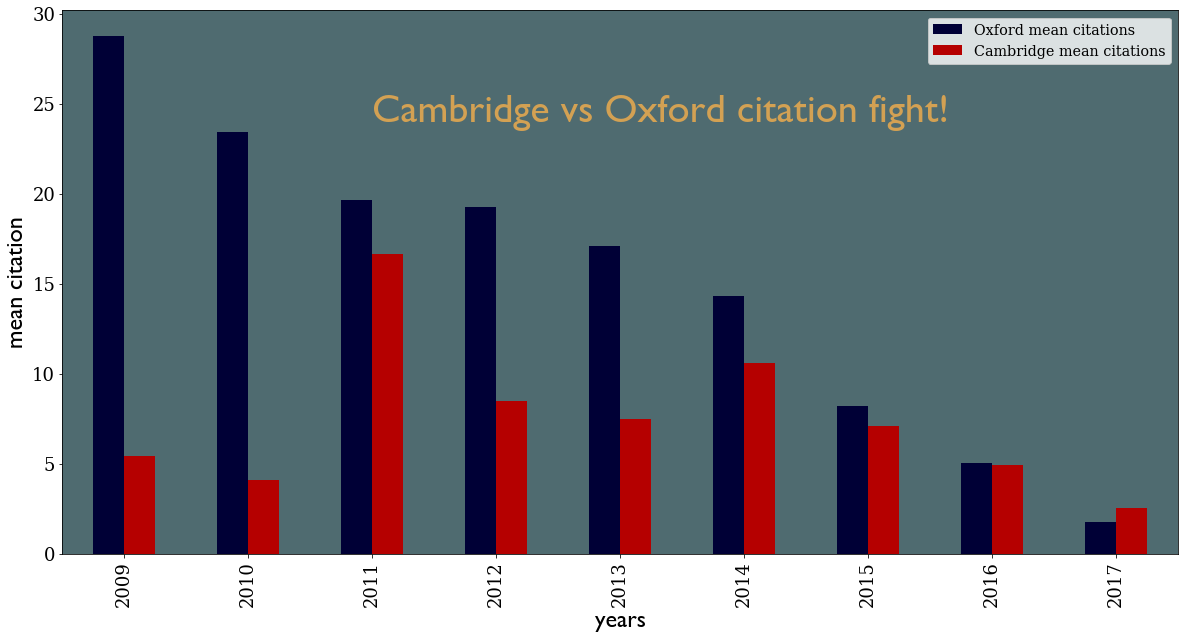

In [11]:
def normalize(x):
    return  [x["Oxford mean citations"]/numpy.log(2019-int(x.name)), x["Cambridge mean citations"]/numpy.log(2019-int(x.name))]

oxbridge_core_citations_norm = pandas.DataFrame(oxbridge_core_citations.apply( lambda x:normalize(x), axis=1))
ax = oxbridge_core_citations_norm.plot(kind="bar", xlim=(2000,2017), figsize=(20,10), color=['#000036','#B50000'])
prop = fm.FontProperties(fname='/Library/Fonts/GillSans.ttc')

ax.text(2,24,"Cambridge vs Oxford citation fight!", color='#D3A153', fontproperties=prop, size=40)
ax.set_facecolor('#4F6B70')
ax.set_ylabel("mean citation",  fontproperties=prop, fontsize=24)
ax.set_xlabel("years", fontproperties=prop, fontsize=24)
ax.legend( fontsize="x-large")
ax.tick_params(labelsize=18)


